# 使用逻辑回归对鸢尾花种类进行分类

# 1 载入训练数据

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model

import  matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#载入数据
iris = datasets.load_iris()#鸢尾花

In [2]:
iris
dir(iris)#表示它包含的项数(数据，特征名，类别，类别名)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.feature_names#（花萼的长宽，花瓣的长宽）

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
np.unique(iris.target)#target是他的类别（三种鸢尾花）

array([0, 1, 2])

In [7]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 2 简化为二分类问题

In [8]:
idx = iris.target != 2 #只区分前两种鸢尾花（通过判断是否不属于第三种花）
print(idx)
data = iris.data[idx].astype(np.float32)#取前两种花的数据
target = iris.target[idx].astype(np.float32)#取前两种花的类别（即第0种和第1种）
print(data)
print(target)
#data = iris.data
#target = iris.target

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 

In [9]:
data.shape

(100, 4)

Text(0, 0.5, 'sepal width (cm)')

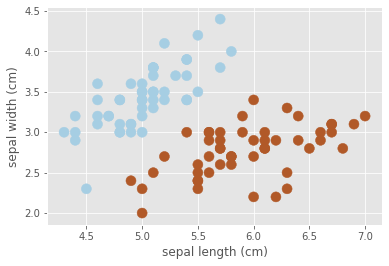

In [10]:
#data[:,0]表示所有行取第0列
plt.scatter(data[:,0],data[:,1],c=target,cmap=plt.cm.Paired,s=100)  #scatter是散点图
plt.xlabel(iris.feature_names[0])#花萼的长
plt.ylabel(iris.feature_names[1])#花萼的宽

## 3 把数据分为训练集和测试集

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, 
                test_size=0.1, random_state=42)     #random一般取42

In [12]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [13]:
X_test.shape, y_test.shape

((10, 4), (10,))

## 4训练分类器

In [14]:
lr = linear_model.LogisticRegression(solver='newton-cg', multi_class='multinomial')#选取逻辑回归
lr.fit(X_train,y_train)
print(lr.coef_)#回归系数
print(lr.intercept_)#截距

[[ 0.22872432 -0.5288244   1.3106937   0.5589373 ]]
[-3.5546808]


In [15]:
metrics.accuracy_score(y_train,lr.predict(X_train))

1.0

In [17]:
lr.get_params()#得到参数

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}